In [2]:
%reload_ext mocodo

Mocodo 3.2.1 loaded.


In [3]:
from IPython import display
from pathlib import Path

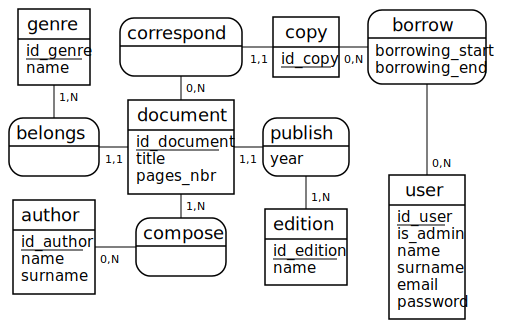

In [7]:
%%mocodo --mld --shapes copperplate --title=gestion_bu --relations mysql
genre: id_genre [int(11)], name [varchar(50)]
correspond, 0N document, 11 copy
copy: id_copy [int(11)]
borrow, 0N copy, 0N user: borrowing_start [date], borrowing_end [date]

belongs, 11 document, 1N genre
document: id_document [int(11)], title [varchar(50)], pages_nbr [smallint]
publish, 11 document, 1N edition: year [date]
:
:

author: id_author [int(11)], name [varchar(50)], surname [varchar(50)]
compose, 0N author, 1N document
edition: id_edition [int(11)], name [varchar(50)]
user: id_user [int(11)], is_admin [boolean], name [varchar(255)], surname [varchar (255)], email [varchar (255)], password [varchar (255)]
:


In [9]:
display.Code(filename="mocodo_notebook/sandbox_mysql.sql", language="mysql")

CREATE DATABASE IF NOT EXISTS `CLIENT_COMMANDE_PRODUIT` DEFAULT CHARACTER SET UTF8MB4 COLLATE utf8_general_ci;
USE `CLIENT_COMMANDE_PRODUIT`;

CREATE TABLE `AUTHOR` (
  `id_author` int(11),
  `name` varchar(50),
  `surname` varchar(50),
  PRIMARY KEY (`id_author`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `BORROW` (
  `id_copy` int(11),
  `id_user` int(11),
  `borrowing_start` date,
  `borrowing_end` date,
  PRIMARY KEY (`id_copy`, `id_user`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `COMPOSE` (
  `id_author` int(11),
  `id_document` int(11),
  PRIMARY KEY (`id_author`, `id_document`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `COPY` (
  `id_copy` int(11),
  `id_document` int(11),
  PRIMARY KEY (`id_copy`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `DOCUMENT` (
  `id_document` int(11),
  `title` varchar(50),
  `pages_nbr` smallint,
  `id_genre` int(11),
  `id_edition` int(11),
  `year` date,
  PRIMARY KEY (`id_document`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `EDITION` (
  `id_edition` int(11),
  `name` varchar(50),
  PRIMARY KEY (`id_edition`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `GENRE` (
  `id_genre` int(11),
  `name` varchar(50),
  PRIMARY KEY (`id_genre`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `USER` (
  `id_user` int(11),
  `is_admin` boolean,
  `name` varchar(255),
  `surname` varchar (255),
  `email` varchar (255),
  `password` varchar (255),
  PRIMARY KEY (`id_user`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

ALTER TABLE `BORROW` ADD FOREIGN KEY (`id_user`) REFERENCES `USER` (`id_user`);
ALTER TABLE `BORROW` ADD FOREIGN KEY (`id_copy`) REFERENCES `COPY` (`id_copy`);
ALTER TABLE `COMPOSE` ADD FOREIGN KEY (`id_document`) REFERENCES `DOCUMENT` (`id_document`);
ALTER TABLE `COMPOSE` ADD FOREIGN KEY (`id_author`) REFERENCES `AUTHOR` (`id_author`);
ALTER TABLE `COPY` ADD FOREIGN KEY (`id_document`) REFERENCES `DOCUMENT` (`id_document`);
ALTER TABLE `DOCUMENT` ADD FOREIGN KEY (`id_edition`) REFERENCES `EDITION` (`id_edition`);
ALTER TABLE `DOCUMENT` ADD FOREIGN KEY (`id_genre`) REFERENCES `GENRE` (`id_genre`);